# Libraries

In [95]:
import cv2
import matplotlib.pyplot as plt
import os 
from skimage.feature import hog
import numpy as np

# Cropping image

In [181]:
def crop_image(image, x_range, y_range):
    x_start, x_end = x_range
    y_start, y_end = y_range
    cropped_image = image[y_start:y_end, x_start:x_end]
    return cropped_image

# Saving Templates

In [31]:
def save_templates(template,output_folder,image_name,template_index):
    template_path=os.path.join(output_folder,f'{image_name}_template_{template_index}.jpg')
    cv2.imwrite(template_path,template)

# folder paths

In [281]:
dataset_folder='/Users/raviirt/Downloads/Images/'

In [264]:
template_folder='/Users/raviirt/Downloads/Templates'

# Template creation

In [278]:
image=cv2.imread('/Users/raviirt/Downloads/Images/p10.jpeg',cv2.COLOR_GRAY2RGB)

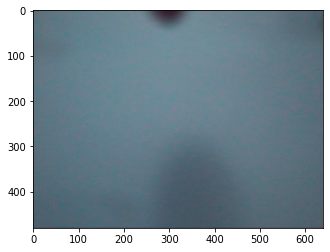

In [279]:
plt.imshow(image)

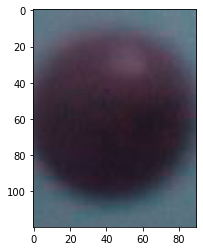

In [275]:
plt.imshow(image[260:380,90:180])

In [287]:
roi_coordinateslist=[(0,310,80,410),(0,310,80,410),(70,200,150,300),(90,350,210,500),(350,180,450,290),(440,340,540,460),(90,260,180,380),(210,400,340,500),(210,400,340,500),(290,0,350,80),(250,0,350,50),(210,0,340,100),(180,180,300,290),(120,410,260,500),(160,0,250,80),(180,0,260,80),(200,100,300,200),(200,280,300,380),(50,180,120,240),(20,310,120,390),(100,100,200,180),(110,220,210,320),(140,440,240,500),(100,100,180,180),(80,120,140,210),(40,250,110,330),(0,420,80,500),(150,100,250,210),(150,100,250,210),(180,200,280,300),(180,450,300,500),(20,80,120,150),(380,0,480,50),(20,380,120,500),(80,80,180,160),(420,250,520,350),(390,450,480,500),(80,290,200,400),(200,0,300,100),(220,50,320,150),(150,320,250,420),(250,350,350,490),(20,400,120,500),(300,320,400,400),(50,100,150,200),(160,450,260,500),(250,0,440,80),(280,0,480,80),(280,0,360,60),(310,80,400,180),(300,280,380,400)]

In [283]:
image_names=[img for img in os.listdir(dataset_folder) if img.endswith(('.jpg', '.png', '.jpeg'))]#getting the file names from the folder.
sorted_image_names=sorted(image_names)#Sorting the image name retrived.here sorting the name(num on image) in ascending order
#Iterating over sorted images and roi coordinates.
for image_name,roi_coordinates in zip(sorted_image_names,roi_coordinateslist):#Creating a tuple by combining both the lists
    image_path = os.path.join(dataset_folder, image_name)#Getting the images file path
    image = cv2.imread(image_path)#Loading the image 
    if image is not None: #Checking the failures while loading the image
        x_start,y_start,x_end,y_end=roi_coordinates#Assigning the roi coordinates 
        # Ensure that coordinates are within image bounds
        #x_start, x_end = max(0, x_start), min(image.shape[1], x_end)
        #y_start, y_end = max(0, y_start), min(image.shape[0], y_end)
        try:
            Template=crop_image(image,(x_start, x_end),(y_start, y_end))#cropping the image using roi coordinates.
            save_templates(Template,template_folder,image_name,1)#Saving the template
            print(f"Image: {image_name}, ROI Coordinates: {roi_coordinates}")#Printing the image name along with it's roi coordinates to check for mismatches
            print(f"Template extraction and saving completed for {image_name}")#priting the acknowledgement 
        #Exception handling
        except Exception as e
            print(f"Error processing image {image_name}: {str(e)}")
            print(f"ROI coordinates: {roi_coordinates}")
            print(f"Image shape: {image.shape}")

    else:
        print(f"Failed to load image: {image_path}")

Image: p00.jpeg, ROI Coordinates: (0, 310, 80, 410)
Template extraction and saving completed for p00.jpeg
Image: p01.jpeg, ROI Coordinates: (0, 310, 80, 410)
Template extraction and saving completed for p01.jpeg
Image: p02.jpeg, ROI Coordinates: (70, 200, 150, 300)
Template extraction and saving completed for p02.jpeg
Image: p03.jpeg, ROI Coordinates: (90, 350, 210, 500)
Template extraction and saving completed for p03.jpeg
Image: p04.jpeg, ROI Coordinates: (350, 180, 450, 290)
Template extraction and saving completed for p04.jpeg
Image: p05.jpeg, ROI Coordinates: (440, 340, 540, 460)
Template extraction and saving completed for p05.jpeg
Image: p06.jpeg, ROI Coordinates: (90, 260, 180, 380)
Template extraction and saving completed for p06.jpeg
Image: p07.jpeg, ROI Coordinates: (210, 400, 340, 500)
Template extraction and saving completed for p07.jpeg
Image: p08.jpeg, ROI Coordinates: (210, 400, 340, 500)
Template extraction and saving completed for p08.jpeg
Image: p09.jpeg, ROI Coordin

# Feature extraction

In [91]:
def template_matching(image_path,template_folder,output_folder,roi_size=(64,64),threshold=0.9):
    img=cv2.imread(image_path)#Reading the image
    if img is None:
        print(f"Error: Unable to load the image from {image_path}")
        return None  # Return None if image loading fails
    img = img.astype(np.uint8)
    template_files = os.listdir(template_folder)
    for template_file in template_files:
        template_path = os.path.join(template_folder,template_file)#Getting the template path
        template = cv2.imread(template_path)#Reading the template
        #if template is None:
            #print(f"Error: Unable to load the template image from {template_path}")
            #continue  # Skip to the next template if loading fails
    print(f"Template image data type: {template.dtype}")
    gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#converting the image to gray scale
    gray_template=cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)#converting the template to gray scale
    temp_matching_result=cv2.matchTemplate(gray_img,gray_template,cv2.TM_CCOEFF_NORMED)#Performing the template matching
    location=np.where(temp_matching_result>=threshold)#Checking for the location of maximum correlation value
    #For drawing a rectangle
    for pt in zip(*location[::-1]):
        w,h=gray_template.shape[::-1]#Getting the width and height of the template
        roi = img[pt[1]-10:pt[1]+h+10,pt[0]-10:pt[0]+w+10]# creating a larger rectangle
        if roi.size == 0:
            print(f"Warning: Empty ROI at location {pt}")
            continue
        roi=cv2.resize(roi,roi_size)
        roi_output_path=os.path.join(output_folder,f"{template_file}_ROI_{pt[0]}_{pt[1]}.png")#creating the roi templates path
        cv2.imwrite(roi_output_path, roi)
        cv2.rectangle(img,(pt[0]-10,pt[1]-10),(pt[0]+w+10,pt[1]+h+10),(0,255,0),1)
        
    return img  

In [92]:
def process_image(image_folder,template_path,output_folder,roi_size=(64,64),threshold=0.9):
    os.makedirs(output_folder,exist_ok=True)#Checking the existence of output folder
    image_files=os.listdir(image_folder)#GEtting all the images from the image folder
    for image_file in image_files:
        image_path=os.path.join(image_folder,image_file)
        output_path=os.path.join(output_folder,image_file)
        result_image = template_matching(image_path, template_path,output_folder,roi_size=roi_size,threshold=threshold)
        if result_image is not None:
            cv2.imwrite(output_path, result_image)

In [94]:
main_image_folder='/Users/raviirt/Downloads/Images/'
template_path='/Users/raviirt/Downloads/Templates/'
output_folder='/Users/raviirt/Downloads/Final Templates/'
roi_size = (64, 64)
threshold = 0.9
process_image(main_image_folder,template_path,output_folder)

Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Error: Unable to load the image from /Users/raviirt/Downloads/Images/.DS_Store
Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Template image data type: uint8
Template image data type:

In [129]:
def compute_hog_features(temps):
    features = hog(temps, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2, 2), block_norm='L2-Hys')
    return features

In [136]:
def processing_template(template_folders):
    all_hog_features=[]
    template_files = os.listdir(template_folders)
    for template_file in template_files:
        template_path = os.path.join(template_folders, template_file)
        template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
        if template is not None:
            hog_feat = compute_hog_features(template)
            all_hog_features.append(hog_feat)
            print(f"HOG features for {template_file}:\n{hog_feat}")
        else:
            print(f"Error: Unable to read the template image from {template_path}")
    return all_hog_features

In [137]:
template_folder = '/Users/raviirt/Downloads/Final Templates/'
processing_template(template_folder)

HOG features for p02.jpeg_template_1.jpg_ROI_66_198.png:
[0. 0. 0. ... 0. 0. 0.]
HOG features for p02.jpeg_template_1.jpg_ROI_49_204.png:
[0.47155429 0.29838237 0.         ... 0.         0.         0.22636612]
HOG features for p02.jpeg_template_1.jpg_ROI_126_223.png:
[0.08390538 0.         0.11866011 ... 0.         0.         0.        ]
HOG features for p02.jpeg_template_1.jpg_ROI_294_271.png:
[0.33848757 0.33848757 0.         ... 0.         0.         0.42005705]
HOG features for p02.jpeg_template_1.jpg_ROI_85_74.png:
[0.40408425 0.         0.         ... 0.         0.         0.        ]
HOG features for p02.jpeg_template_1.jpg_ROI_82_69.png:
[0.17769505 0.         0.         ... 0.27520276 0.         0.        ]
HOG features for p02.jpeg_template_1.jpg_ROI_91_270.png:
[0.38263592 0.         0.         ... 0.         0.         0.        ]
HOG features for p02.jpeg_template_1.jpg_ROI_91_264.png:
[0.11059872 0.05941609 0.09580556 ... 0.         0.         0.46215935]
HOG features for

[array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.47155429, 0.29838237, 0.        , ..., 0.        , 0.        ,
        0.22636612]),
 array([0.08390538, 0.        , 0.11866011, ..., 0.        , 0.        ,
        0.        ]),
 array([0.33848757, 0.33848757, 0.        , ..., 0.        , 0.        ,
        0.42005705]),
 array([0.40408425, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.17769505, 0.        , 0.        , ..., 0.27520276, 0.        ,
        0.        ]),
 array([0.38263592, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.11059872, 0.05941609, 0.09580556, ..., 0.        , 0.        ,
        0.46215935]),
 array([0.24868111, 0.        , 0.04595762, ..., 0.15010295, 0.0791112 ,
        0.        ]),
 array([0.48726208, 0.32152713, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.51343574, 0.30451033, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.2

In [142]:
test_labels=[0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [141]:
len(test_labels)

51